# 1. Accès aux données / Analyse globale

▪ Utilisez la bibliothèque pandas pour récupérer les données du fichier bird.csv. Vous pouvez préciser lors de la lecture quelle est la feature correspondant aux index (Cours - page 41).

In [ ]:
import pandas as pd

data = pd.read_csv("bird.csv", index_col = "id")
data

▪ Quelle est la taille du DataSet, et de quel type sont les variables, y a-t-il des informations manquantes.

In [13]:
data.dtypes

huml     float64
humw     float64
ulnal    float64
ulnaw    float64
feml     float64
femw     float64
tibl     float64
tibw     float64
tarl     float64
tarw     float64
type      object
dtype: object

▪ Supprimez les données manquantes. Combien reste-t-il de données dans le DataSet. En utilisant la fonction value_counts() sur la colonne (ou Series pour pandas) type comment se répartissent les 6 catégories.

In [15]:
data.dropna(inplace=True)
data

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
id,,,,,,,,,,,
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW
...,...,...,...,...,...,...,...,...,...,...,...
415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15,SO
416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15,SO
417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21,SO


▪ A partir du DataSet créez un matrice X contenant les données d’entrée et une matrice Y contenant les différents types.


In [ ]:
X = data.drop(['type'], axis=1)
Y = data['type']
Y = pd.DataFrame(Y)

▪ Grâce à la fonction unique() sur des data récupérer la liste des différents type d’oiseaux.

In [21]:
Y = data['type']
LO = Y.unique()
LO

array(['SW', 'W', 'T', 'R', 'P', 'SO'], dtype=object)

# 1. Découpage des données

▪ Découpé le DataSet en deux DataSet pour l'apprentissage et le test. Vous utiliserez la classe train_test_split() de model_selection pour un découpage de 33% (test).

In [34]:
from sklearn.model_selection import train_test_split
X = data.drop(['type'], axis=1)
Y = data['type']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
X_train.shape

(276, 10)

▪ Quel est la taille de vos données de test et de train.

▪ Calculez la répartition des différents types d’oiseaux entre le train et le test. Cette répartition est-elle acceptable.

In [29]:
ct_train = Y_train.value_counts()
ct_test = Y_test.value_counts()

In [33]:
result = pd.DataFrame({'train' : ct_train, 'test' : ct_test, '%train' : (ct_train/Y.value_counts())*100, '%test' : (ct_test/Y.value_counts())*100})
result

,train,test,%train,%test
P,25,13,65.789474,34.210526
R,32,16,66.666667,33.333333
SO,84,40,67.741935,32.258065
SW,75,41,64.655172,35.344828
T,16,7,69.565217,30.434783
W,44,20,68.750000,31.250000


# 3. Modèle de KNN

▪ Créer un KNeighborsClassifier comme modèle d’apprentissage, en laissant le nombre de voisins à la valeur par défaut.

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

▪ Utiliser les fonctions d’apprentissage et de prédiction pour classer les oiseaux du data de test. Quel est le score obtenu.

In [36]:
Y_pred_knn = knn.predict(X_test)
knn.score(X_test, Y_test)

0.7226277372262774

▪ Avec l’outil de confusion_matrix de la bibliothèque metrics affichez grâce à la fonction heatmap de seaborn la matrice de confusion obtenue à partir de la comparaison des sorties réelles des dates de tests et des sorties estimées.

In [41]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(Y_test, Y_pred_knn, labels=list(LO))
conf

array([[29,  6,  1,  1,  2,  2],
       [ 6,  7,  0,  3,  2,  2],
       [ 0,  0,  5,  0,  2,  0],
       [ 3,  0,  0, 11,  2,  0],
       [ 0,  0,  1,  1,  8,  3],
       [ 0,  0,  0,  0,  1, 39]])

<AxesSubplot:>

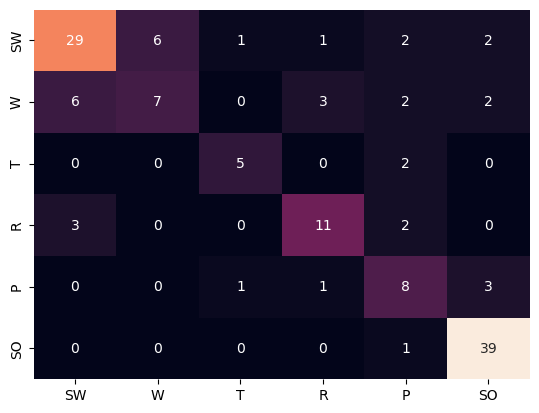

In [44]:
import seaborn as sns
sns.heatmap(conf, annot=True, cbar=False, xticklabels=list(LO), yticklabels=list(LO))

▪ En faisant varier l’hyper paramètre n_neighbors entre les valeurs [1 à 15] quels sont les différents scores des modèles. Quel est la meilleure valeur de ce paramètre, ainsi que le score obtenu.

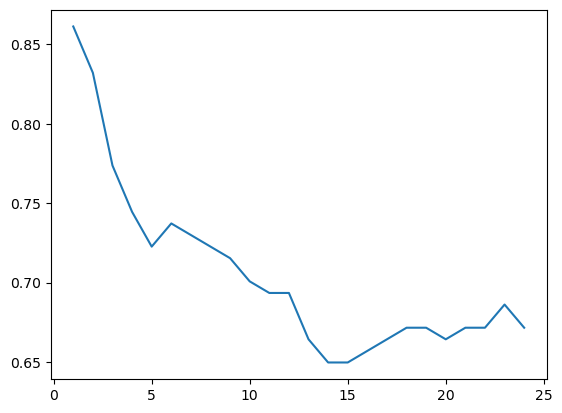

In [46]:
import matplotlib.pyplot as plt
score = []
for n in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, Y_train)
    score.append(knn.score(X_test, Y_test))
plt.plot(range(1, 25), score)

In [47]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
knn.score(X_test, Y_test)

0.8613138686131386

<AxesSubplot:>

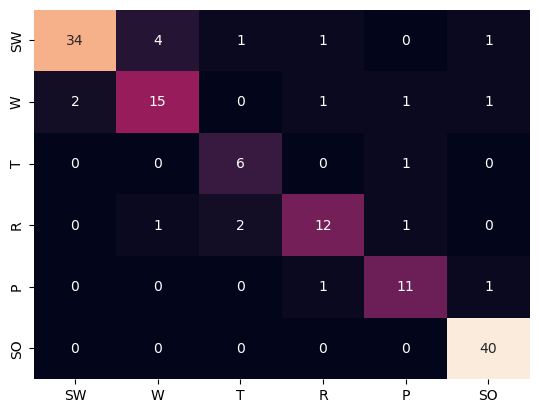

In [48]:
conf = confusion_matrix(Y_test, Y_pred_knn, labels=list(LO))
sns.heatmap(conf, annot=True, cbar=False, xticklabels=list(LO), yticklabels=list(LO))